In [3]:
def biomethane(G_in, G_comp):
    #G_comp=[ch4Out, co2Out, noxOut, soxOut]
    #constants
    ch4_pur = 0.965  #ch4 density of biomethane in Brazil
    v_bm = G_in * (G_comp[0] / ch4_pur)  #biomethane produced
    
    return v_bm


def scm_to_m3(scm):
    #biomethane storage temperature = 50C
    #source: https://checalc.com/solved/volconv.html
    K = 273 #temp conversion to Kelvin
    P1 = P2 = 1 #pressure
    T1 = 15 #scm temp
    T2 = 50 #biomethane temp
    m3 = scm * (P1/P2) * ((T2+K)/(T1+K))
    return m3

def biofertilizer(digOut):
    # vs_r = 0.43   #rate of volatile solid in the total manure
    # vs = kilos * vs_r  #amount of volatile solid
    
    #pdy = (kilos - vs) + (vs * 0.4)  #(non-volatile solid) + (remnants of volatile solid)
    pdy = digOut * 0.9 #rate of digestate conversion to biofertilizer
    
    return pdy
    
def ghg(iIn, wComp, G_in, G_comp):
    #GHG release by manure type (unit: g/head/yr) -> g/tonne  (kilos kg/day)
    #CH4: cattle 39.5; swine 18; poultry 0.157
    #CO2: cattle 12; swine 5.47; poultry 0.048
    #NOx: cattle 0.02; swine 0.02; poultry 0.005
    #SOx: 0
    ch4_ghg = [39500, 18000, 157]
    co2_ghg = [12000, 5470, 48]
    nox_ghg = [20, 20, 5]
    
    #unit conversion to g/tonne -> need the weight of manure by types
    # manure amount (tonne_conv) * SUM (composition of manure type by animal (wComp) * GHG emission per day by animal (ch4_ghg/365))
    tonne_conv = iIn * 0.001
    ch4_r = tonne_conv * (wComp[0] * (ch4_ghg[0]/365) + wComp[1]* (ch4_ghg[1]/365) + wComp[2] * (ch4_ghg[2]/365))
    co2_r = tonne_conv * (wComp[0] * (co2_ghg[0]/365) + wComp[1] * (co2_ghg[1]/365) + wComp[2] * (co2_ghg[2]/365))
    nox_r = tonne_conv * (wComp[0] * (nox_ghg[0]/365) + wComp[1] * (nox_ghg[1]/365) + wComp[2] * (nox_ghg[2]/365))
    sox_r = 0 #value is minimal
    
    ghg_r = [ch4_r,co2_r,nox_r,sox_r]
    
    #GHG captured during the biogas post-treatment process
    #tentatively measured based on the result from biomethane & biogas composition rate
    ch4_c = 0.001 * biomethane(G_in, G_comp)
    co2_c = 0.001 * G_in * G_comp[1] * 0.9 #CO2 recovery rate 90%
    nox_c = 0.001 * G_in * G_comp[2]
    sox_c = 0.001 * G_in * G_comp[3]
    
    ghg_c = [ch4_c,co2_c,nox_c,sox_c]
    
    return ghg_r, ghg_c

def bgm_cost(G_comp, G_in, digOut):
    #wComp, G_in are used for biogas cost
    #digOut is used for biofertilizer cost

    #BIOGAS COST
    #parameters:
    #energy consumtion (ec) = 0.2534 kWh/kg_co2
    #electricity cost = 0.07 USD/kWh
    #area of polymeric membrane required (pma)= 67.7m2/kg_co2
    #polymeric membrane cost = 20 USD/m2
    # 1 m3 (CO2) = 1.836 kg
    ec = 0.2534 * G_in * G_comp[1]*1.836
    pma = 67.7 * G_in * G_comp[1]*1.836
    tc_bg = (ec * 0.07) + (pma * 20)/2738

    #BIOFERTILIZER COST
    #parameters:
    #Treatment cost of raw digestate = 275 USD/tonne
    tc_bf = 275 * digOut * 0.001

    #LABOUR COST
    #assumption: one person is needed to maintain 
    #both biogas upgrading & biofertilizer processing
    #Direct labour cost based on 8h/day; 15$/h
    lc = 8 * 15

    # print("Cost of biogas upgrading:", tc_bg)
    # print("Cost of digesate treatment:",tc_bf)
    # print("Cost of labour:", lc)
    # print("Total operating cost of Biogas Module:", tc_bg + tc_bf + lc)

    return tc_bg + tc_bf + lc

In [4]:
ghg_r, ghg_c = ghg(100,120,200,100)

print("Released GHG: ", ghg_r)
print("Captured GHG: ", ghg_c)

TypeError: 'int' object is not subscriptable

In [5]:
iIn

NameError: name 'iIn' is not defined

In [9]:
biomethane(100)

Daily amount of effleunt gas:  100 scm/d
CH4 composition rate:  0.6
CH4 purity rate:  0.965
------------------------
Amount of Bio-methane produced:  62.17616580310881 scm/d


62.17616580310881

In [10]:
biofertilizer(100)

Total manure processed per day:  100 kg/d
Amount of volatile solid:  43.0
------------------------
Amount of biofertilizer produced:  74.2 kg/d


74.2

[0.         0.01020408 0.02040816 0.03061224 0.04081633 0.05102041
 0.06122449 0.07142857 0.08163265 0.09183673 0.10204082 0.1122449
 0.12244898 0.13265306 0.14285714 0.15306122 0.16326531 0.17346939
 0.18367347 0.19387755 0.20408163 0.21428571 0.2244898  0.23469388
 0.24489796 0.25510204 0.26530612 0.2755102  0.28571429 0.29591837
 0.30612245 0.31632653 0.32653061 0.33673469 0.34693878 0.35714286
 0.36734694 0.37755102 0.3877551  0.39795918 0.40816327 0.41836735
 0.42857143 0.43877551 0.44897959 0.45918367 0.46938776 0.47959184
 0.48979592 0.5       ]
return [1.         0.97030603 0.94237552 0.91610375 0.89139221 0.86814823
 0.84628466 0.82571953 0.80637572 0.78818069 0.77106623 0.75496817
 0.73982613 0.72558335 0.71218642 0.69958511 0.68773216 0.67658313
 0.66609622 0.65623211 0.64695381 0.63822652 0.63001753 0.62229606
 0.61503315 0.60820157 0.6017757  0.59573145 0.59004616 0.5846985
 0.57966843 0.57493709 0.57048673 0.56630067 0.56236321 0.55865958
 0.55517591 0.55189913 0.54881694

Text(0, 0.5, 'A')

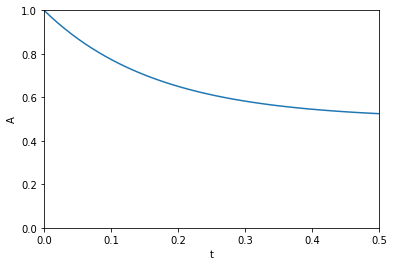

In [12]:

import autograd.numpy as np
A0 = 1.0
def A(t, k1, k_1):
    print(t)
    print("return",A0 / (k1 + k_1) * (k1 * np.exp(-(k1 + k_1) * t) + k_1))
    return A0 / (k1 + k_1) * (k1 * np.exp(-(k1 + k_1) * t) + k_1)
%matplotlib inline
import matplotlib.pyplot as plt
t = np.linspace(0, 0.5)
k1 = 3.0
k_1 = 3.0
plt.plot(t, A(t, k1, k_1))
plt.xlim([0, 0.5])
plt.ylim([0, 1])
plt.xlabel('t')
plt.ylabel('A')

In [10]:
import numpy as np

n_g = np.linspace(1,5,5)
n_g = int(round(n_g,0))

TypeError: type numpy.ndarray doesn't define __round__ method

vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
vector [0.483662871, 1.0, 26.2359775, 0.00111820675, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
return [47171289.307398334, 47206272.40055585, 47241255.493713364, 47276238.58687089, 47311221.6800284, 47346204.7731859

Text(0, 0.5, 'NPV')

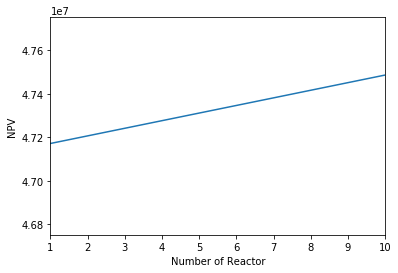

In [25]:
import pandas as pd
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from sko.GA import GA

from constants import *
from cost_module_funcs2 import do_all_list_cp,system_npv,JtokWh ,farmer_npv
from digesterModule import digester
import cost_module_funcs2 as C2
import Transport as T
import biogas as B
import pickle
from math import inf

# Variables we want to keep track in DOE
farm=[]
system=[]
# with open('data_transport.p', 'rb') as fp:
#     dict_T = pickle.load(fp)
with open('full_transp.p', 'rb') as fp:
    dict_T = pickle.load(fp)

# url=r'C:\Users\Ricardo Hopker\Massachusetts Institute of Technology\EM.428 MDO Biogas spring 2021 - General\Assignment A2'
# DOE = pd.read_csv(url+'\\DOE.csv')
DOE = pd.read_csv('DOE.csv')
 #Variables below are which farms should be activated

# vector1 = [n_g,V_gburnP] #design variables
# DOE_vector = [vector1,vector2] #all design vectors for DOE
# DOE_vector=[]
# for i in range(0,18):
#     vector =  DOE.loc[i].values.flatten().tolist()
#     DOE_vector.append(vector[1:])

# DOE_n = 0


import matplotlib.pyplot as plt
import autograd.numpy as np

# A0 = 1.0
# def A(t, k1, k_1):



def biodigestor(DV2_ng,printt=False,pen=True):
    #Use printt to print the text within your modules, when running the optimization it should be set to False
    #Use pen to penalize the function contraints being violated, when running the optimization it should be set to True
    # DOE_n = DOE_n+1
    # print('Design of experiment #%.0f' % (DOE_n))
    #Optimal latitude and longitude for Digestor
    #Digest_location = T.digestor_loc

    #This loads the respective farms - 1 is active, 0 is inactive. Total farms must be at least 3 active (required by annealing)
    #TOTAL_SOLIDS PERCENTAGE IS NOT USED
    vector = [4.83662871e-01, 1.00000000e+00, 2.62359775e+01, 
            1.11820675e-03, 1.00000000e+00, 0.00000000e+00,0.00000000e+00, 
            1.00000000e+00, 0.00000000e+00, 1.00000000e+00,0.00000000e+00]
    print('vector',vector)
    active_farms= vector[4:11] 
    active_farms = [0 if num<1 else 1 for num in active_farms ]
    # [distance, wIn, total_solids_perc, wComp] = T.load_data(1,1,1,1,1,1,1)
    # [distance, wIn, total_solids_perc, wComp] = T.load_data(*active_farms,printt)
    # if sum(active_farms)>2:
    if printt:
        [distance, wIn, total_solids_perc, wComp] = T.load_data(*active_farms,printt)
    else:
        [distance, wIn, total_solids_perc, wComp] = dict_T[tuple(active_farms)]
    
    #output from digester -- will return 9 values & print to console
    Tdig = vector[2]
    
    [W_a, typ, V_d, G_in, G_comp, digOut, digOut_comp] = digester(wIn,wComp,Tdig)
    # H_needed = JtokWh(H_needed*1000)
    # print('----')
    
    #biogas module
    V_g = B.biomethane(G_in, G_comp) #biomethane
    #bg = B.biomethane_validation(kilos, wComp)
    f_p = B.biofertilizer(digOut) 
    ghg_r, ghg_c = B.ghg(W_a, wComp, G_in, G_comp) #ghg_r: released gas, ghg_c: captured gas
    bgm_total = B.bgm_cost(G_comp, G_in, digOut)
    
    #COST Module
    V_g =V_g*working_days
    ghg = pd.DataFrame()
    ghg['ghg_lf']=ghg_r
    ghg['ghg_tech']=ghg_c
    ghg['gas']= ['CH4','CO2','NOX','SOX']
    list_ghg = []
    for gas in ['CH4','CO2','NOX','SOX']:
        list_ghg.append(ghg[ghg['gas']==gas].values.flatten().tolist())
    list_ghg = do_all_list_cp(W_a,distance,list_ghg)
    
    n_g = DV2_ng
    #print("n_g",n_g)
    V_gburn = vector[0]*V_g
    #print('vector[0]',vector[0])
    debt_level = vector[3]
    
    return -farmer_npv(n_g,V_gburn,V_d,typ,distance,f_p,V_g,debt_level,e_c,e_priceB,f_used,p_bf,printt,pen)




# t = np.linspace(0, 0.5)
# k1 = 
# k_1 = 3.0

import numpy as np

ngs = np.linspace(1, 10,10)

returned_v = []
for ng in ngs:
    returned_v.append(biodigestor(ng))

print('return',returned_v)


plt.plot(ngs, returned_v)
plt.xlim([1, 10])
plt.ylim([46751289, 47751289])
plt.xlabel('Number of Reactor')
plt.ylabel('NPV')



# import autograd.numpy as np
# A0 = 1.0
# def A(t, k1, k_1):
#     return A0 / (k1 + k_1) * (k1 * np.exp(-(k1 + k_1) * t) + k_1)
# %matplotlib inline
# import matplotlib.pyplot as plt
# t = np.linspace(0, 0.5)
# k1 = 3.0
# k_1 = 3.0
# plt.plot(t, A(t, k1, k_1))
# plt.xlim([0, 0.5])
# plt.ylim([0, 1])
# plt.xlabel('t')
# plt.ylabel('A')